$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
import matplotlib.pyplot as plt
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [4]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A ): #add appropriate arguments to the function
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code to compute step length
  a = np.dot(gradf.T,gradf)
  b = 2 * np.dot(np.dot(gradf.T,A),gradf)
  step_length = a/b
  return step_length

In [5]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) ==2
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  #implement the backtracking line search
  while evalf(x - alpha * gradf) > (evalf(x) - gamma * alpha * np.dot(gradf.T,gradf)) :
    alpha = rho * alpha
  #print('final step length:',alpha)
  return alpha

In [6]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [7]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k


In [8]:

my_start_x = np.array([1,1])
my_tol= 1e-5


x_opt,k = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print("For Constant step length")
print("* The minimizer:",x_opt)
print("* Function value:",evalf(x_opt))
print("* No of iterations : ",k)

x_opt_els,k = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("For Exact line search")
print("* The minimizer:",x_opt_els)
print("* Function value:",evalf(x_opt_els))
print("* No of iterations : ",k)
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls,k= find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(" For Backtracking line search")
print("* The minimizer:",x_opt_bls)
print("* Function value:",evalf(x_opt_bls))
print("* No of iterations : ",k)


For Constant step length
* The minimizer: [  7.99999775 -11.99999582]
* Function value: 2.2517218946096954e-11
* No of iterations :  67
For Exact line search
* The minimizer: [  8. -12.]
* Function value: 0.0
* No of iterations :  1
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
 For Backtracking line search
* The minimizer: [  8. -12.]
* Function value: 0.0
* No of iterations :  1


3. [R] Note down the minimizer and minimum function value of $f(x) = f(x_1, x_2) = (x_1 − 8)^2 + (x_2 + 12)^2.$

Sol :

For Constant step length
* The minimizer: [  7.99999775 -11.99999582]
* Function value: 2.2517218946096954e-11
* No of iterations :  67

For Exact line search
* The minimizer: [  8. -12.]
* Function value: 0.0
* No of iterations :  1

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5

For Backtracking line search
* The minimizer: [  8. -12.]
* Function value: 0.0
* No of iterations :  1


4. [R] Consider stopping tolerance τ = $10^{−12}$ and starting point $x_0 = (25, 25)$. Compare the number of iterations
taken by the gradient descent procedure which uses exact step length computation against the gradient descent procedure which uses the backtracking line search procedure (with $α_0$ = 1, ρ = 0.5, γ = 0.5). Comment on your
observations.


Sol.  We can see that for the tolerance $τ =  10^{−12}$ and starting point $x_0 = (25,25)$ We can see that number of iterations is 144 for constant step length while number of iterations is 1 for backtracking line search and 1 for exact line search  This is huge drop in number of iterations to find minimizer

In [15]:
my_tol = (10)**(-12)
my_start_x = np.array([25,25])
x_opt,k = find_minimizer(my_start_x, my_tol,CONSTANT_STEP_LENGTH )
print(x_opt)
print("Number of iterations in constant step length is : ",k)
x_opt_els,k = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("For Exact line search")
print("* The minimizer:",x_opt_els)
print("* Function value:",evalf(x_opt_els))
print("* No of iterations : ",k)

x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(x_opt_bls)
print("Number of iterations in Backtraining line search procedure: ",k)

[  8. -12.]
Number of iterations in constant step length is :  144
For Exact line search
* The minimizer: [  8. -12.]
* Function value: 0.0
* No of iterations :  1
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
[  8. -12.]
Number of iterations in Backtraining line search procedure:  1


5. [R] With starting point x0 = (25, 25) and τ = 10−10, we will now study the behavior of the backtracking line
search algorithm for different choices of α0.Take γ = ρ = 0.5. Try α0 ∈ {1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.
For each α0, record the final minimizer, final objective function value and number of iterations taken by the
gradient descent algorithm with backtracking line search to terminate. Prepare a plot where the number of
iterations is plotted against α0 values. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the α0 values. Check and comment if for any α0
value, gradient descent with backtracking line search takes lesser number of iterations when compared to the
gradient descent procedure with exact line search.


solution : 

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1

Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  12

Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  20

Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  30

Params for Backtracking LS: alpha start: 0.5 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1

Params for Backtracking LS: alpha start: 0.4 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  18

Params for Backtracking LS: alpha start: 0.25 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  40

Params for Backtracking LS: alpha start: 0.1 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  123

Params for Backtracking LS: alpha start: 0.01 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1358


Observation : Minimizer is same for all alpha_0 values and No of iteraion was decreasing intially as alpha decreases and after it reaches minimum no of iterations it keeps on increasing as alpha0 decreases.

compared to exact line search none of iterations of backtracking line search never less than it , for alpha_0 = 0.5,1 no of iterations is 1 same as number of itearions in exact line search

In [16]:
my_start_x  = np.array([25,25])
my_tol = 1e-10

my_start_alpha = [1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
iterations = []

for a in my_start_alpha:
  x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, a, 0.5,0.5)
  iterations.append(k)
  print("* Minimizer :",x_opt_bls)
  print("* Number of iterations  is: ",k)
  print("using exact line search ")

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  12
Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  20
Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  30
Params for Backtracking LS: alpha start: 0.5 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1
Params for Backtracking LS: alpha start: 0.4 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  18
Params for Backtracking LS: alpha start: 0.25 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  40
Params for Backtracking LS: alpha start: 0.1 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  123
Params fo

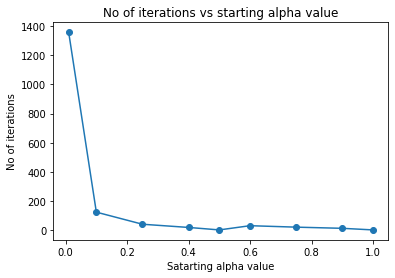

In [11]:
plt.plot(my_start_alpha,iterations)
plt.scatter(my_start_alpha,iterations)
plt.xlabel("Satarting alpha value")
plt.ylabel("No of iterations")
plt.title("No of iterations vs starting alpha value");

6. [R] With starting point x0 = (25, 25) and τ = 10−10, we will now study the behavior of the backtracking line
search algorithm for different choices of ρ. Take α = 1, γ = 0.5. Try ρ ∈ {0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.
For each ρ, record the final minimizer, final objective function value and number of iterations taken by the
gradient descent algorithm with backtracking line search to terminate. Prepare a plot where the number of
iterations is plotted against ρ values. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the ρ values. Check and comment if for any ρ value,
gradient descent with backtracking line search takes lesser number of iterations when compared to the gradient
descent procedure with exact line search.


solution :: 

Minimizer, function value is same for all rho values . [8,-12] , function value is 0 

for rho  = 0.5 number od iterations is 1 same as exact line search and for any other rho value number of iterations is greater than 1  and nothing below 1 .

about graph :  as rho value decreases number of iterations is increasing and it become 1 for rho = 0.5 and again it is keep on increasing .




Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  9

Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  15

Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  22

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1

Params for Backtracking LS: alpha start: 1 rho: 0.4  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  18

Params for Backtracking LS: alpha start: 1 rho: 0.25  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  40

Params for Backtracking LS: alpha start: 1 rho: 0.1  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  123

Params for Backtracking LS: alpha start: 1 rho: 0.01  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1358




In [17]:
my_start_x = np.array([25,25])
my_tol = 1e-10
my_rho = [0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
iterations_r  = []
for r in my_rho:
  x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, r,0.5)
  iterations_r.append(k)
  print("* Minimizer :",x_opt_bls)
  print("* Number of iterations  is: ",k)
  



Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  9
Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  15
Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  22
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1
Params for Backtracking LS: alpha start: 1 rho: 0.4  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  18
Params for Backtracking LS: alpha start: 1 rho: 0.25  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  40
Params for Backtracking LS: alpha start: 1 rho: 0.1  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  123
Params for Backtracking LS: alpha start: 1 rho: 0.01  gamma: 0.5
* Minimizer : [  8. -12.]
* Number of iterations  is:  1358


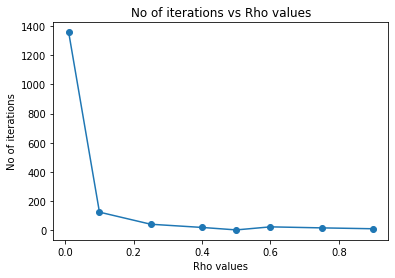

In [13]:
plt.plot(my_rho,iterations_r)
plt.scatter(my_rho,iterations_r)
plt.xlabel("Rho values")
plt.ylabel("No of iterations")
plt.title("No of iterations vs Rho values");